In [1]:
import numpy as np
import matplotlib.pyplot as plt


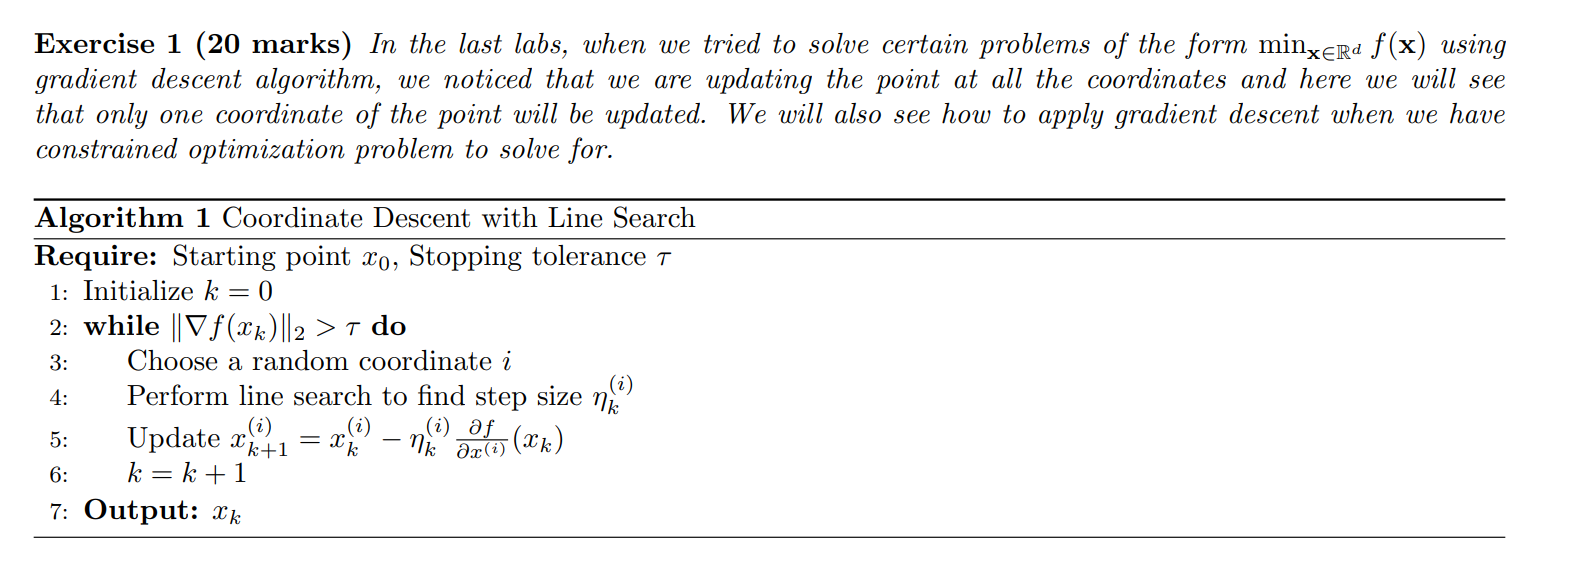

In [2]:
def fx(x):
  fx= x[0]**2+4*x[0]*x[1]+4*x[1]**2
  return fx
def grad_fx(x):
  grad=[2*x[0]+4*x[1],8*x[1]+4*x[0]]
  return np.array(grad)
def hes_fx(x):
  hes=[[2,4],[4,8]]
  return np.array(hes)

In [3]:
x=[3,4,4,4]
lis=[0 for i in range(len(x))]
lis[1]=x[3]
print(lis)
dk=np.outer(np.array(lis),np.transpose(lis))
dk


[0, 4, 0, 0]


array([[ 0,  0,  0,  0],
       [ 0, 16,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]])

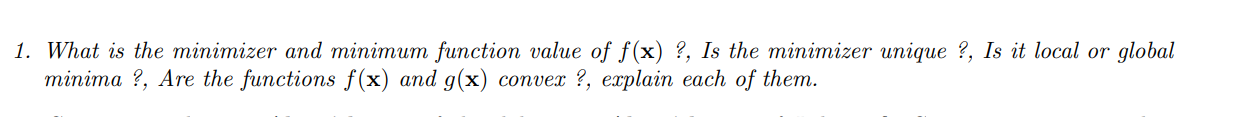

To find the minimum value and minimizers of the function $ f(x) = x_1^2 + 4x_1x_2 + 4x_2^2 $, we can take the gradient of the function and set it to zero.

Let's denote the gradient of $ f(x) $ as $ \nabla f(x) $. We have:

$
\nabla f(x) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix} 2x_1 + 4x_2 \\ 4x_1 + 8x_2 \end{bmatrix}
$

Setting the gradient to zero, we get:

$
\begin{cases}
2x_1 + 4x_2 = 0 \\
4x_1 + 8x_2 = 0
\end{cases}
$




### Convexity Analysis:
To analyze convexity, we'll check the Hessian matrix's positive definiteness. The Hessian matrix is:

$H = \begin{bmatrix} 2 & 4 \\ 4 & 8 \end{bmatrix} $

The eigenvalues of this matrix are found by solving the characteristic equation $ \text{det}(H - \lambda I) = 0 $:

$\text{det}\left(\begin{bmatrix} 2-\lambda & 4 \\ 4 & 8-\lambda \end{bmatrix}\right) = (2-\lambda)(8-\lambda) - 16 = \lambda^2 - 10\lambda = 0 $

Solving this equation gives us eigenvalues $ \lambda_1 = 0 $and $ \lambda_2 = 10 $. Since both eigenvalues are positive, the Hessian matrix is positive definite, indicating convexity.

### Critical Points:
The gradient of the function is:

$\nabla f(x_1, x_2) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix} 2x_1 + 4x_2 \\ 4x_1 + 8x_2 \end{bmatrix} $

Setting each component of the gradient to zero and solving for $ x_1 $and $ x_2 $, we get:

$2x_1 + 4x_2 = 0 \implies x_1 = -2x_2 $

$4x_1 + 8x_2 = 0 \implies x_1 = -2x_2 $

This equation represents a line in the $ x_1-x_2 $plane. So, there are infinitely many critical points along this line.

### Minimum Value:
Since the function is convex, any critical point is a global minimum. We can choose any point on the line $ x_1 = -2x_2 $to find the minimum value. For example, if we set $ x_2 = 1 $, we get $ x_1 = -2 $.

So, a minimizer is $ (-2, 1) $, and the minimum value is:

$f(-2, 1) = (-2)^2 + 4*(-2)*1 + 4*1^2 = 4 - 8 + 4 = 0 $

Therefore, the minimum value of the function is 0, and one of the minimizers is $ (-2, 1) $. Since the function is convex, any point along the line $ x_1 = -2x_2 $also minimizes the function.


### Convexity of Indicator Function

Consider the function $ g(x) = 1_{L(x)} $, where $ L(x) $ is a set such that:


$1_{L(x)}$ = \begin{cases}
0 & \text{if } x \in L, \\
\infty & \text{if } x \notin L.
\end{cases}


This function is commonly used in convex analysis to represent indicator functions for convex sets. The convexity of $ g(x) $ depends on the convexity of the set $ L(x) $.

- If $ L(x) $ is convex, then $ g(x) $ is a convex function because for any two points $ x_1 $ and $ x_2 $ in $ L(x) $, and any $ λ $ in $[0, 1]$, we have:
$g(λ_1 + (1-λ)x_2) = 1_{L(λ_1 + (1-λ)x_2)} = 1 $
because $ λ_1 + (1-λ)x_2 $ lies in $ L(x) $.

- Conversely, if $ L(x) $ is not convex, then $ g(x) $ will not be convex. You can find points $ x_1, x_2 $ in $ L(x) $ and $ λ $ in $[0, 1]$ such that $ λ_1 + (1-λ)x_2 $ does not belong to $ L(x) $, leading to $ g(λ_1 + (1-λ)x_2) = \infty $.


The function g(x) =$ 1_{L(x)}$, where L(x) is defined as:

$1_{L(x)}$ = {
  0 if x is in L,
 ∞ if x is not in L.
}

The minimizer of this function depends on the set L(x). If L(x) is empty, then there is no point where g(x) is equal to 0, and hence there is no minimizer. However, if L(x) is non-empty, then any point in L(x) minimizes the function, as g(x) = 0 at those points.

If L(x) is non-empty, then the value of the function at its minimizer is 0.

It's important to note that the value of the function is infinite outside of L(x), so the minimizer only makes sense when L(x) is non-empty.


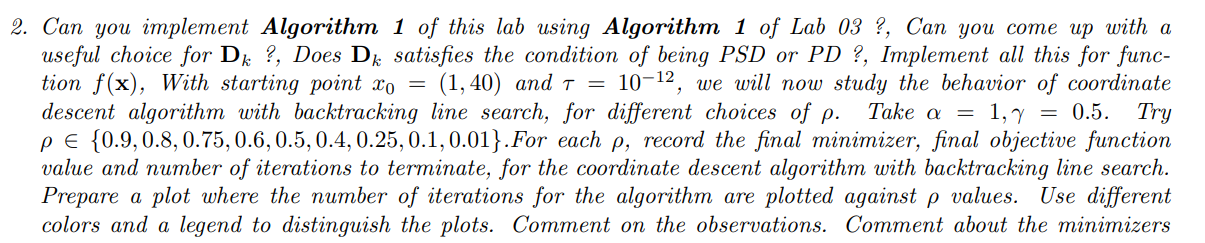
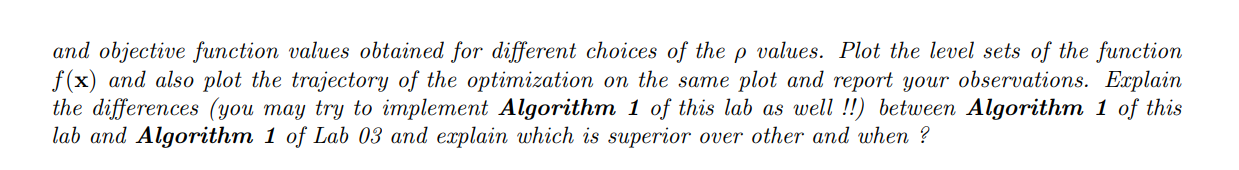

In [4]:
def coordinate_descent(x):
  k=0
  iteration=[]
  tau=1e-10
  fx_norm=np.linalg.norm(grad_fx(x))

  while fx_norm>tau:
    eta=0.5
    index=np.random.randint(len(x))
    x_i=x[index]
    print(index)
    lis=[0 for i in range(len(x))]
    lis[index]=1
    xnew=x[index]-eta*(grad_fx(x)@np.transpose(lis))
    print(grad_fx(x)@np.transpose(lis))
    x[index]=xnew
    fx_norm=np.linalg.norm(grad_fx(x))
    print(x)
    print(fx(x))
    k=k+1
  iteration.append(k)
  return iteration
coordinate_descent([2,2])

0
12
[-4.0, 2]
0.0


[1]

In [5]:
def Dk(x):
  dk=np.outer(np.array(x),np.transpose(x))
  return dk
Dk([0.0,1.0])

array([[0., 0.],
       [0., 1.]])

Dk is positive semidefinite always because it has all eigen values greater than 0 .So it is PSD

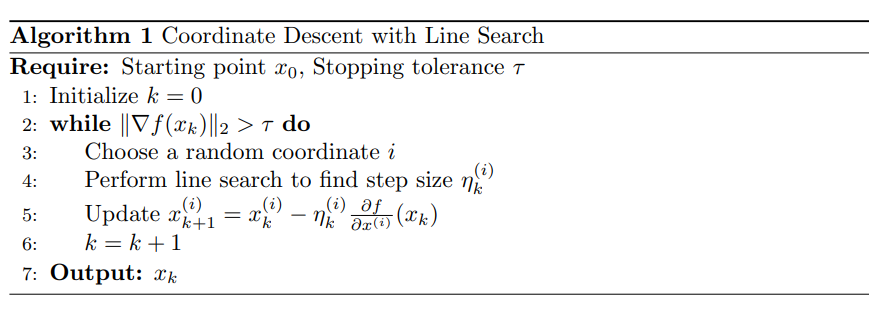

Taking Dk of previous lab we can update as all other column to be 0 and the coordinate selected randomly, that column will be taken as a main column containing 1 at that position which is randomly seleted  due to which on multiplication in backtracking we get exact single coordinate update and doing this we get expression like in gradient descent for finding step size using backtracking So using this we can use our new Dk in previous lab and corresponsigly all the algo changes to single coordinate algo.

In [6]:
#Algo-1(Previous lab)
def get_alpha_with_scaling(xk,index,x_i, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -grad_fx(xk)
  while fx(xk + alpha*Dk@pk) > (fx(xk) + gamma*alpha*grad_fx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha
#with scale back track
def coordinate_descent_with_scale(x0):
  x_all=[]
  iteration=[]
  optimizers=[]
  optimal_value=[]

  rho=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
  for r in rho:
    tau=1e-5
    x=np.copy(np.array(x0))
    pk=grad_fx(x)
    k=0
    gamma=0.5
    dk=np.array(Dk(x))
    cor=[]
    cor.append(x)

    fx_norm=np.linalg.norm(pk)
    while fx_norm>tau:
      index=np.random.randint(len(x))
      lis=[0 for i in range(len(x))]
      lis[index]=1
      dk=Dk(lis)

      x_i=x[index]

      alpha=get_alpha_with_scaling(x,index,x_i, 1, r, 0.5, dk)
      grad=grad_fx(x)
      #print(alpha*grad[index])
      x=(x-alpha*(dk@grad))

      #x[index]=((x_i)-(alpha*grad[index]))

      cor.append(x)
      pk=grad_fx(x)
      fx_norm=np.linalg.norm(pk)
      k=k+1
    optimizers.append(x)
    iteration.append(k)
    x_all.append(cor)
    optimal_value.append(fx(x))
  return iteration,optimizers,optimal_value,x_all

iteration,optimizers,optimal_value,x_all=coordinate_descent_with_scale([1.,40.])

In [7]:
rho=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
for i in range(len(rho)):
  print(f'Rho:{rho[i]} no of iteration: {iteration[i]} optimizers: {optimizers[i]} optimal_value: {optimal_value[i]}')
  print('___________________________________________________________________________________________________________')


Rho:0.9 no of iteration: 6 optimizers: [-76.48673463  38.24336742] optimal_value: 0.0
___________________________________________________________________________________________________________
Rho:0.8 no of iteration: 10 optimizers: [-67.36074874  33.68037509] optimal_value: 2.7284841053187847e-12
___________________________________________________________________________________________________________
Rho:0.75 no of iteration: 11 optimizers: [ 0.45995982 -0.22997942] optimal_value: 9.44966327409702e-13
___________________________________________________________________________________________________________
Rho:0.6 no of iteration: 16 optimizers: [-7.3839273   3.69196451] optimal_value: 2.9558577807620168e-12
___________________________________________________________________________________________________________
Rho:0.5 no of iteration: 1 optimizers: [-80.  40.] optimal_value: 0.0
___________________________________________________________________________________________________

Coordinate Descent with Backtracking is an optimization algorithm that iteratively updates one coordinate (or dimension) of the optimization variable while keeping the others fixed, and dynamically adjusts the step size using backtracking line search. One key observation regarding Coordinate Descent with Backtracking is its simplicity and ease of implementation, making it suitable for optimizing non-smooth or non-convex objective functions. The algorithm's ability to update each coordinate independently allows for parallelization, enabling efficient optimization of high-dimensional problems. Additionally, the inclusion of backtracking line search ensures convergence to a local minimum while minimizing the number of function evaluations and avoiding unnecessary iterations. However, Coordinate Descent with Backtracking may converge slowly, especially for highly correlated or ill-conditioned problems, due to its sequential update strategy and lack of global information about the objective function.

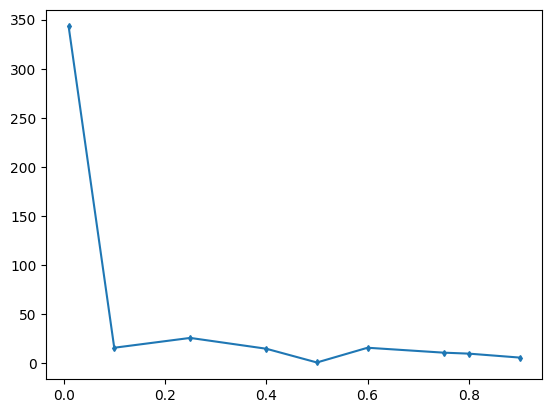

In [8]:
rho=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

plt.plot(rho, iteration, marker = 'd', markersize = 3)

It is clearly seen from graph that iteration largely depends on value of rho for 0.5 it takes

In [9]:
for i in range(len(rho)):
  print(x_all[i])

[array([ 1., 40.]), array([-76.4840978,  40.       ]), array([-76.4840978 ,  38.29019349]), array([-76.4840978 ,  38.24336742]), array([-76.48662038,  38.24336742]), array([-76.48672988,  38.24336742]), array([-76.48673463,  38.24336742])]
[array([ 1., 40.]), array([-65.3552,  40.    ]), array([-65.3552    ,  33.71010629]), array([-67.04685831,  33.71010629]), array([-67.35271014,  33.71010629]), array([-67.35271014,  33.68111421]), array([-67.36050752,  33.68111421]), array([-67.36050752,  33.68037509]), array([-67.3607063 ,  33.68037509]), array([-67.36074224,  33.68037509]), array([-67.36074874,  33.68037509])]
[array([ 1., 40.]), array([1.        , 7.56341553]), array([1.        , 1.10539926]), array([ 1.        , -0.18037034]), array([ 0.46062495, -0.18037034]), array([ 0.46062495, -0.22036916]), array([ 0.46062495, -0.22833279]), array([ 0.46062495, -0.22991832]), array([ 0.45995982, -0.22991832]), array([ 0.45995982, -0.22996765]), array([ 0.45995982, -0.22997747]), array([ 0.45

for value of rho 0.9


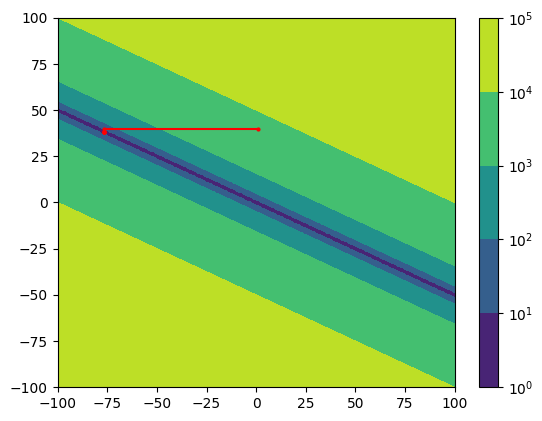

for value of rho 0.8


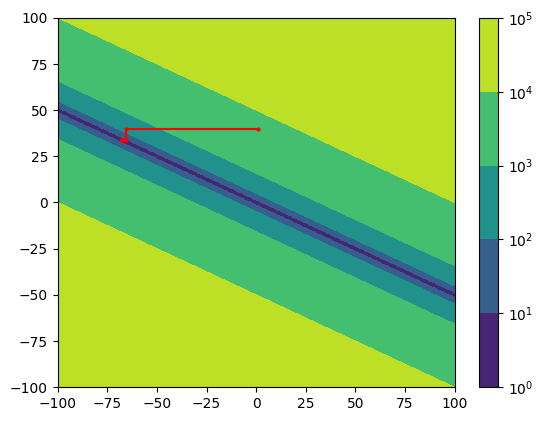

for value of rho 0.75


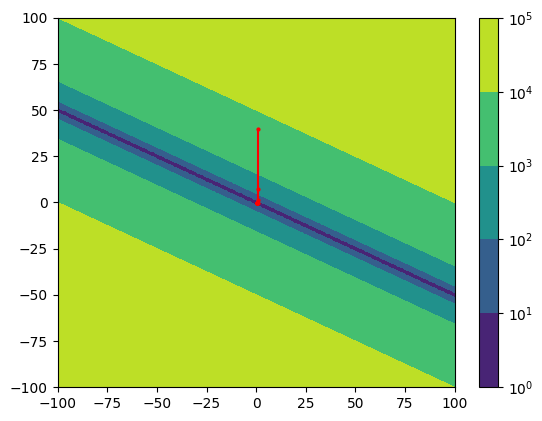

for value of rho 0.6


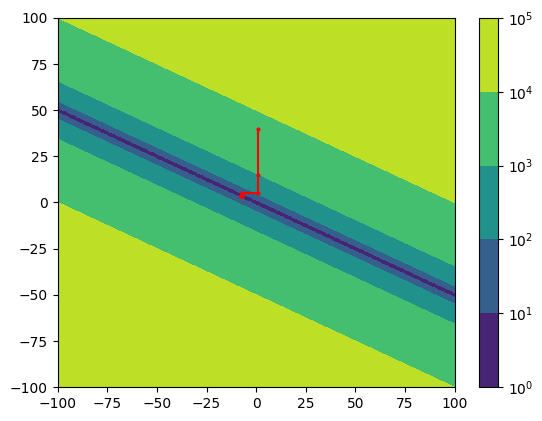

for value of rho 0.5


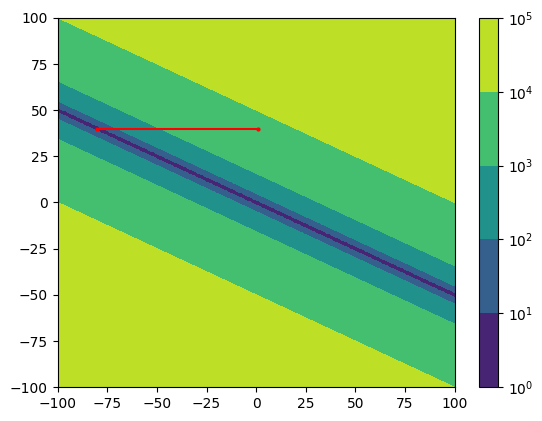

for value of rho 0.4


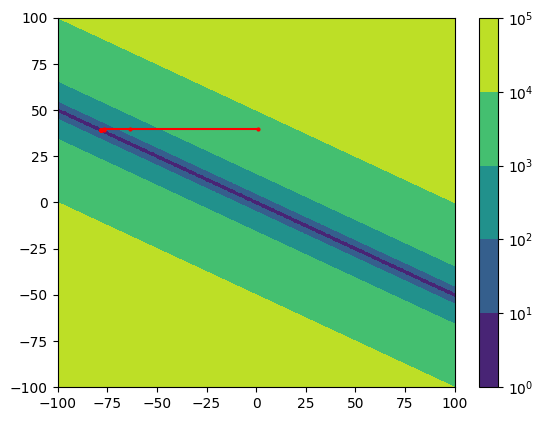

for value of rho 0.25


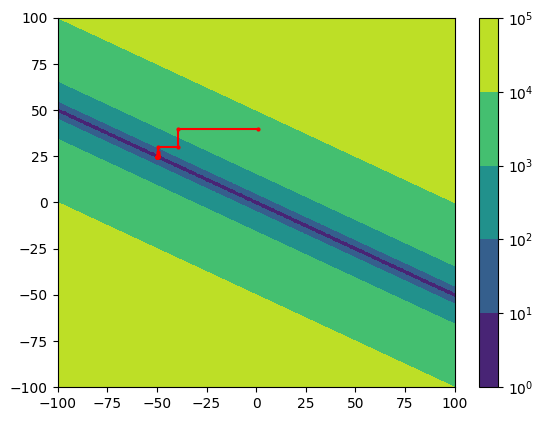

for value of rho 0.1


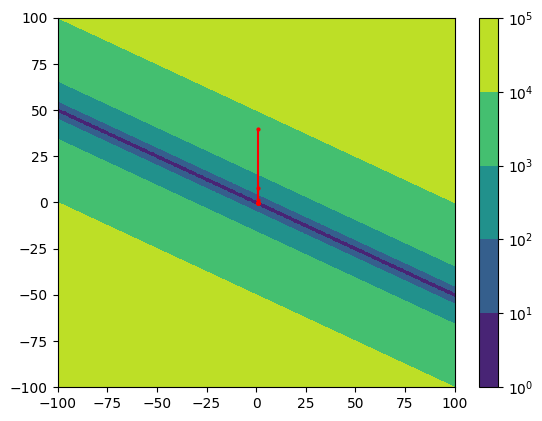

for value of rho 0.01


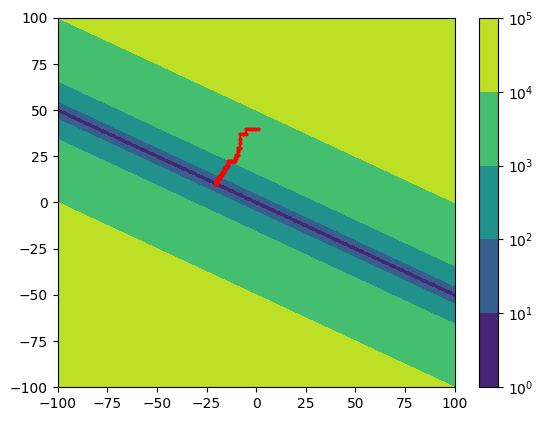

In [10]:
from matplotlib import ticker,cm


for i in range(len(rho)):
  x = np.linspace(-100, 100, 100)
  y = np.linspace(-100, 100, 100)
  X, Y = np.meshgrid(x, y)
  Z = fx([X,Y])
  p = plt.contourf(X,Y,Z,locator=ticker.LogLocator())
  cbar = plt.colorbar(p)
  xcordinates = []
  ycordinates = []
  x0=(x_all[i])
  print("for value of rho",rho[i])
  for j in x0:
    xcordinates.append(j[0])
    ycordinates.append(j[1])
  plt.plot(xcordinates,ycordinates, marker='o', color="red", markersize = 2, label = "coordinate_descent")
  plt.show()

Gradient Descent with Scaling (using a matrix D) and Coordinate Descent are both optimization algorithms used to minimize functions, but they differ in their approaches and when they are applied effectively.


**When one is superior to the other:**
- **Gradient Descent with Scaling:**  
  - Superior when the function is smooth and well-behaved, especially when dimensions are highly correlated or have different scales.
  - Suitable for functions where the gradient provides meaningful information about the direction of steepest descent.
- **Coordinate Descent:**  
  - Superior when the function is separable into independent components or has a sparse gradient.
  - Effective for high-dimensional problems where optimizing along each coordinate individually is computationally cheaper.

The choice between Gradient Descent with Scaling and Coordinate Descent depends on the problem's characteristics such as dimensionality, smoothness, correlation between variables, computational resources, and sparsity of the gradient.


**Observation:**

By plotting the values of each rho we get different trajectories for each value of rho and the trajectories ,no of iteration are different for each rho which we visualise above for rho = 0.5 we get minimum iteration and we get direct optimal vlaue in coordinate descent trajectories are different due to choice of random coordinate every time and there is always different coordinates and we can say by decreasing value of rho we can handle rate which is clearly visualised in last plot for rho =0.01.

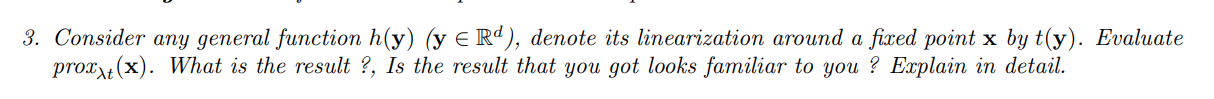

Consider any general function $ h(y) $ where $ y \in \mathbb{R}^d $, denote its linearization around a fixed point $ x $ by $ t(y) $. Evaluate $ \text{prox}_\lambda t(x) $.

**Linearization of $ h(y) $ around a fixed point $ x $**:
The linearization of $ h(y) $ around a fixed point $ x $ is denoted by $ t(y) $. This means we approximate $ h(y) $ with a linear function $ t(y) $ near the point $ x $. Mathematically, it can be represented as:
$ t(y) = h(x) + \nabla h(x)^T (y - x)$
where $ \nabla h(x) $ is the gradient of $ h(y) $ evaluated at $ x $.

**Evaluate $ \text{prox}_\lambda t(x) $**:
The proximal operator of a function $ f(y) $, denoted as $ \text{prox}_\lambda f(x) $, is defined as the solution to the following optimization problem:
$ \text{prox}_\lambda f(x) = \arg\min_{y} \left\{ f(y) + \frac{1}{2\lambda} \| y - x \|_2^2 \right\}$
In our case, $ f(y) = t(y) $. So, we need to solve:
$ \text{prox}_\lambda t(x) = \arg\min_{y} \left\{ t(y) + \frac{1}{2\lambda} \| y - x \|_2^2 \right\}$

**Solving for $ \text{prox}_\lambda t(x) $**:
We can solve the optimization problem by taking the derivative with respect to $ y $, setting it to zero, and solving for $ y $. This will give us the minimizer $ \text{prox}_\lambda t(x) $.

**Result**:
The result will be the value of $ y $ that minimizes the objective function $ t(y) + \frac{1}{2\lambda} \| y - x \|_2^2 $.

This result might look familiar because it resembles the proximal operator of the original function $ h(y) $, where $ \lambda $ acts as a regularization parameter. The proximal operator helps us solve optimization problems involving functions with nonsmooth or nonconvex terms efficiently by incorporating a quadratic regularization term.

In summary, evaluating $ \text{prox}_\lambda t(x) $ involves finding the minimizer of a function that is the sum of the linearized function $ t(y) $ and a quadratic regularization term. This operation is often used in optimization algorithms such as proximal gradient descent for solving convex optimization problems.


To solve for $ \text{prox}_\lambda t(x) $, we need to find the minimizer of the objective function:

$ \text{prox}_\lambda t(x) = \arg\min_{y} \left\{ t(y) + \frac{1}{2\lambda} \| y - x \|_2^2 \right\} $

Here, $ t(y) = h(x) + \nabla h(x)^T (y - x) $. Substituting $ t(y) $ into the objective function, we have:

$ \text{prox}_\lambda t(x) = \arg\min_{y} \left\{ h(x) + \nabla h(x)^T (y - x) + \frac{1}{2\lambda} \| y - x \|_2^2 \right\} $

Expanding the norm term $ \| y - x \|_2^2 $ gives us:

$ \| y - x \|_2^2 = (y - x)^T (y - x) = y^T y - 2y^T x + x^T x $

So, the objective function becomes:

$ \text{prox}_\lambda t(x) = \arg\min_{y} \left\{ h(x) + \nabla h(x)^T (y - x) + \frac{1}{2\lambda} (y^T y - 2y^T x + x^T x) \right\} $

Now, to find the minimizer, we take the derivative of this objective function with respect to $ y $, set it to zero, and solve for $ y $. Let's denote the minimizer as $ y^* $.

Taking the derivative with respect to $ y $, we get:

$ \frac{\partial}{\partial y} \left( h(x) + \nabla h(x)^T (y - x) + \frac{1}{2\lambda} (y^T y - 2y^T x + x^T x) \right) = 0 $

$ \Rightarrow \nabla h(x) + \frac{1}{\lambda} (y^* - x) = 0 $

$ \Rightarrow \nabla h(x) + \frac{1}{\lambda} y^* - \frac{1}{\lambda} x = 0 $

$ \Rightarrow \frac{1}{\lambda} y^* = -\nabla h(x) + \frac{1}{\lambda} x $

$ \Rightarrow y^* = \lambda (-\nabla h(x) + \frac{1}{\lambda} x) $

$ \Rightarrow y^* = x - \lambda \nabla h(x) $

So, the minimizer $ y^* $, which is $ \text{prox}_\lambda t(x) $, is given by $ x - \lambda \nabla h(x) $.

So it is very familar to gradient descent term used to update the value of coordinate after each iteration .


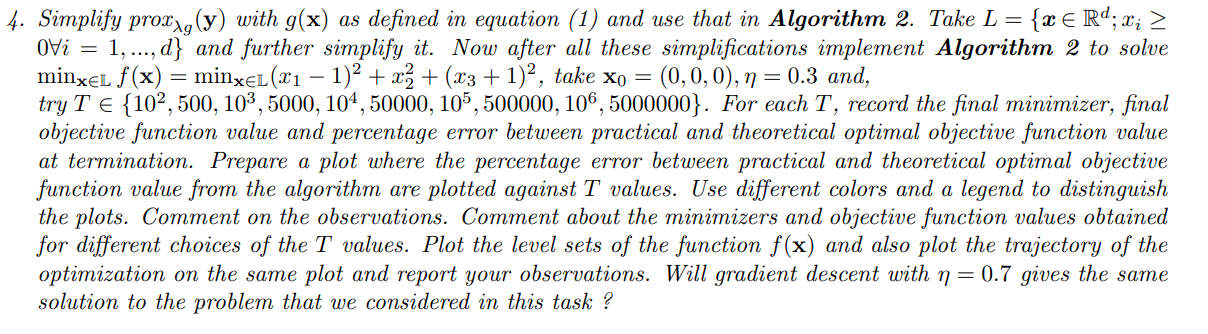

In [3]:
def fx1(x):
  fx=(x[0]-1)**2+x[1]**2+(x[2]+1)**2
  return fx
def grad_fx1(x):
  grad=[2*(x[0]-1),2*x[1],2*(x[2]+1)]
  return np.array(grad)
def prox(x):
  y=[]
  for i in x:
    y.append(max(i,0))
  return y

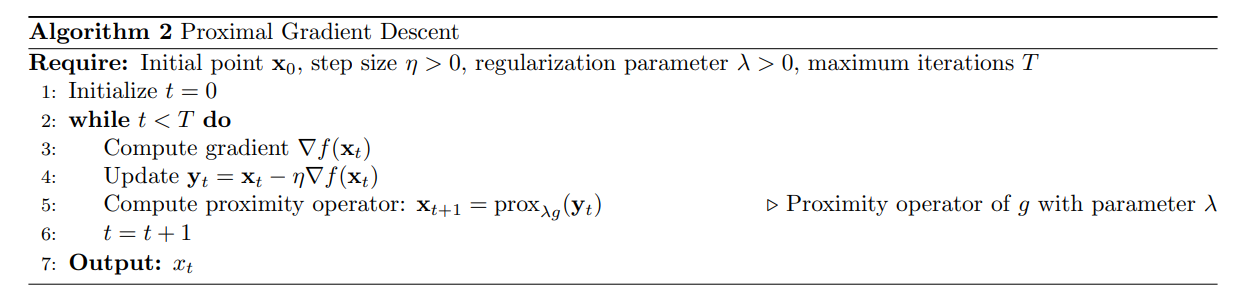

In [2]:
def proximal_gradient_descent(x,T,eta):
  t=0
  iteration=[]
  optimal=[]
  optimizers=[]
  x_all=[]
  while t<T:
    grad=grad_fx1(x)
    y=x-eta*grad
    x=prox(y)
    t=t+1
    x_all.append(x)
  optimal.append(fx1(x))
  optimizers.append(x)
  iteration.append(t)
  return iteration,optimizers,optimal,x_all



T:100  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
_____________________________________________________________________


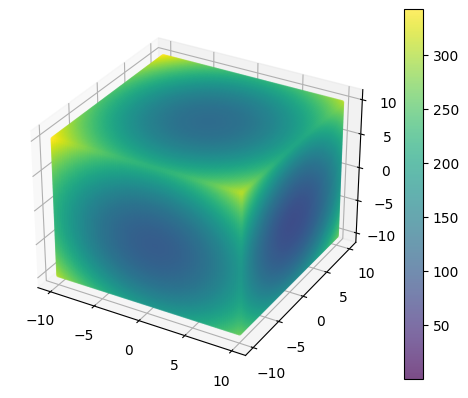

T:500  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
_____________________________________________________________________


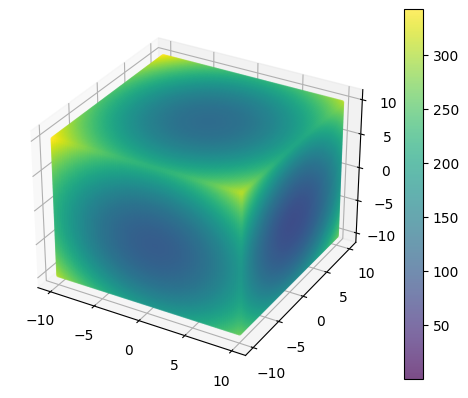

T:1000  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
_____________________________________________________________________


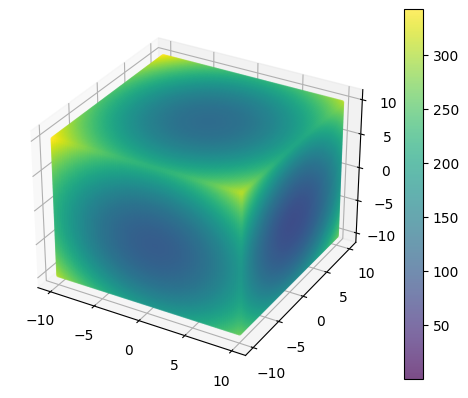

T:5000  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
_____________________________________________________________________


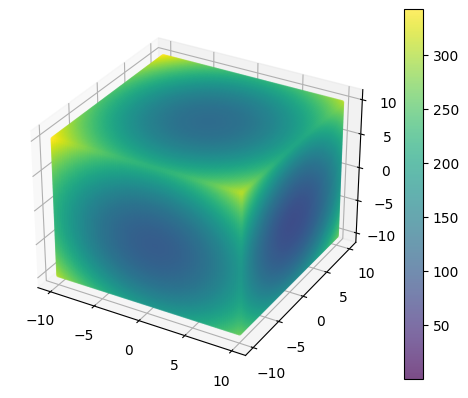

T:10000  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
_____________________________________________________________________


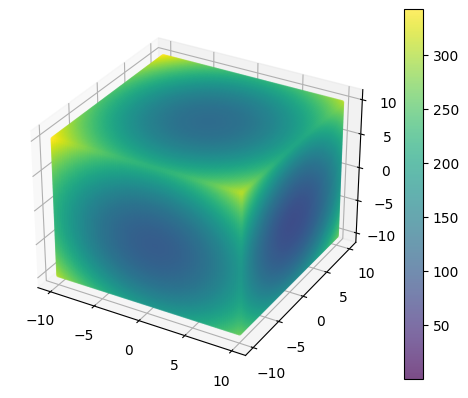

T:50000  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
_____________________________________________________________________


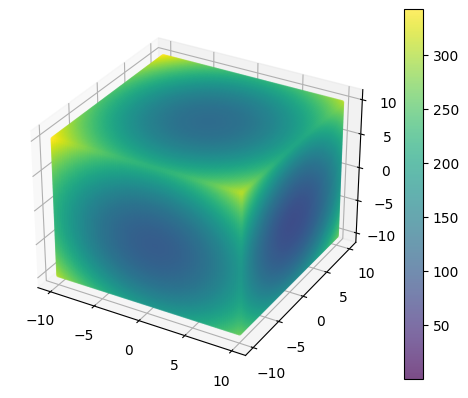

T:100000  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
_____________________________________________________________________


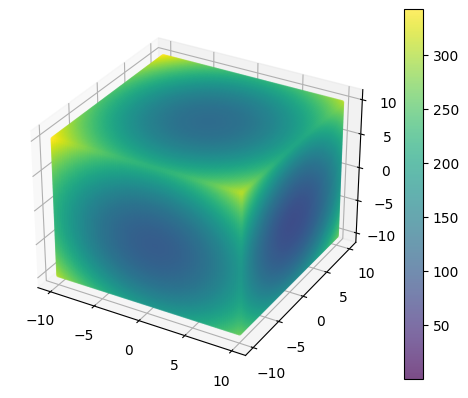

T:500000  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
_____________________________________________________________________


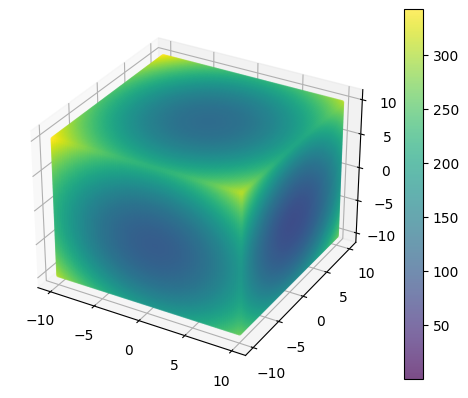

T:1000000  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
_____________________________________________________________________


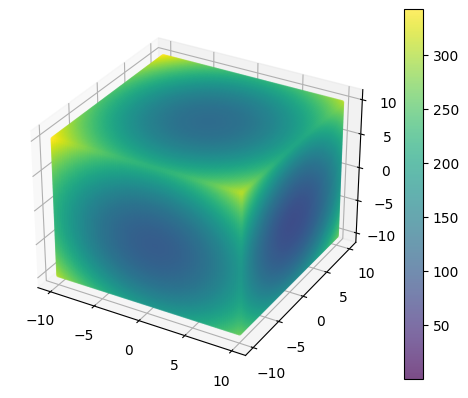

T:5000000  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
_____________________________________________________________________


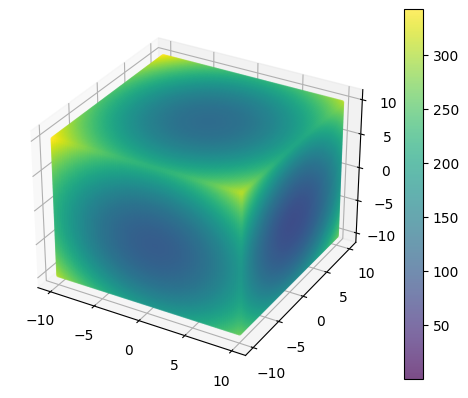

In [6]:
#for eta=0.3
max_itr=[10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6,5000000]
optimal_values_f=[]
for T in max_itr:
  x=[0.,0.,0.]
  eta=0.3
  iteration,optimizers,optimal,x_all=proximal_gradient_descent(x,T,eta)
  optimal_values_f.append(optimal)
  print(f'T:{T}  optimizers: {optimizers} optimal_value: {optimal}')
  print('_____________________________________________________________________')
  x = np.linspace(-10, 10, 100)
  y = np.linspace(-10, 10, 100)
  z = np.linspace(-10, 10, 100)
  X, Y ,Z= np.meshgrid(x, y,z)
  U = fx1([X,Y,Z])
  #cbar = plt.colorbar(p)
  #p = plt.contourf(X,Y,Z,locator=ticker.LogLocator())
  fig = plt.figure()
  ax = plt.axes(projection="3d")

  # Creating plot
  ax.scatter(optimizers[0][0] ,optimizers[0][1] , optimizers[0][2],  color='red')
  img=ax.scatter3D(X, Y, Z, c=U, alpha=0.7, marker='.')
  fig.colorbar(img)
  coor1=[]
  coor2=[]
  coor3=[]
  for k in x_all:
    coor1.append(k[0])
    coor2.append(k[1])
    coor3.append(k[2])
  ax.scatter(coor1 ,coor2 , coor3,  color='red')

  plt.show()



Proximal Gradient Descent (PGD) is a versatile optimization algorithm that combines the efficiency of gradient descent with the ability to handle non-smooth and structured regularization terms through proximity operators. One key observation regarding PGD is its effectiveness in solving optimization problems with non-smooth, non-convex, and composite objectives, commonly encountered in machine learning tasks such as sparse regression, structured prediction, and signal processing. By incorporating proximity operators, PGD efficiently handles regularization terms, promoting sparsity or enforcing constraints while still benefiting from the fast convergence properties of gradient descent. Additionally, PGD allows for fine-tuning of the step size or learning rate, providing flexibility in balancing the trade-off between convergence speed and solution quality. However, PGD's convergence rate may be slower compared to smooth optimization methods, particularly in the presence of strong non-smooth components. Moreover, the choice of proximity operator and regularization parameters can significantly impact the algorithm's convergence behavior and solution quality.

Percentage error, also known as relative error, is a measure of how inaccurate a value is relative to the true value. It's typically expressed as a percentage and is calculated using the formula:

$ \text{Percentage Error} = \left| \frac{\text{Approximate Value} - \text{True Value}}{\text{True Value}} \right| \times 100\% $

In your case, if the true value (or original value) is \(0\), then the formula simplifies to:

$ \text{Percentage Error} = \left| \frac{\text{Approximate Value} - 0}{0} \right| \times 100\% = \left| \frac{\text{Approximate Value}}{0} \right| \times 100\% $

Since division by \(0\) is undefined, we need to handle this case separately. When the original value is \(0\), the percentage error is undefined for any practical value (i.e., any non-zero value). This is because the denominator becomes \(0\), resulting in an undefined expression.

So,this will be not applicable in our case therefore for this function we are not able to find plots but for any other function we may.


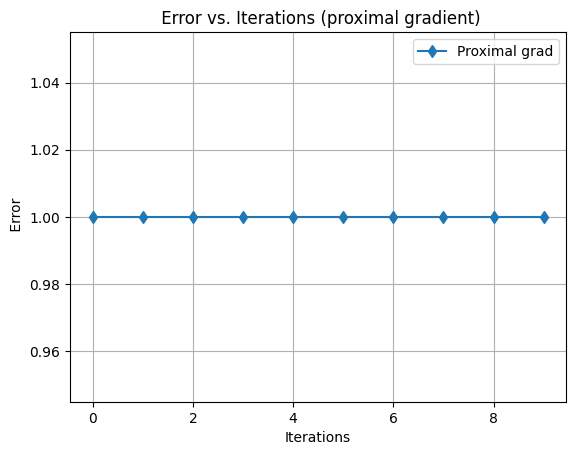

In [9]:
max_itr=[10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6,5000000]
error=optimal_values_f
plt.plot(error,label='Proximal grad',marker='d')
plt.xlabel("Iterations")
plt.ylabel(" Error")
plt.title(" Error vs. Iterations (proximal gradient)")
plt.legend()
plt.grid(True)
plt.show()


the log percentage error are not visualise  therefore I plot it with error .
I can plot the 3D plot diagrams of the function and trajectory is a line which is not visualiseable  and we can find all the optimizers and optimal values for every number of iteration but we got similar answer for each value of iteration but it is not global minuimum because we use a set L which converts a problem a constrained problem in which all values of $x_i$ is greater than 0 therefore in this constarained optimized problem we got minimum value at 1,0,0 and the optimal value is 1.

In [14]:
#for eta =0.7
max_itr=[10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6,5000000]
for T in max_itr:
  x=[0.,0.,0.]
  eta=0.7
  iteration,optimizers,optimal,x_all=proximal_gradient_descent(x,T,eta)
  print(f'T:{T}  optimizers: {optimizers} optimal_value: {optimal}')
  print('_________________________________________________________________')

T:100  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
___________________________________________________________________________________________________________
T:500  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
___________________________________________________________________________________________________________
T:1000  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
___________________________________________________________________________________________________________
T:5000  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
___________________________________________________________________________________________________________
T:10000  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
___________________________________________________________________________________________________________
T:50000  optimizers: [[1.0, 0.0, 0]] optimal_value: [1.0]
___________________________________________________________________________________________________________
T:100000  

On changing eta to 0.7 their is no change is observed in terms of finding otpimal for each number of iterations . and finding the same optimal value and optimizers but algorithms depends on eta because for some eta optimal values we got at some less number of iteration

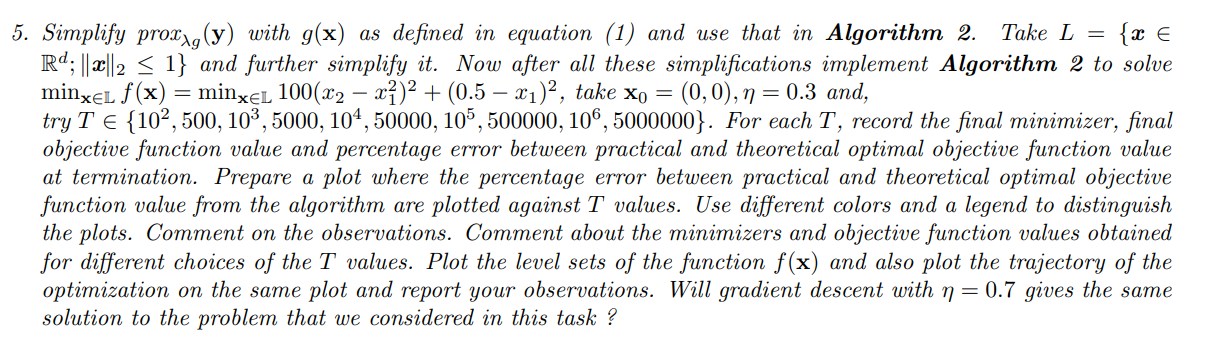

In [10]:
def fx2(x):
  fx=100*(x[1]-x[0]**2)**2+(0.5-x[0])**2
  return fx
def grad_fx2(x):
  grad=[-400*(x[1]-x[0]**2)*x[0]-2*(0.5-x[0]),200*(x[1]-x[0]**2)]
  return np.array(grad)
def proxy2(x):

  if np.linalg.norm(x)<=1:
    return x
  else :
    x=(x/np.linalg.norm(x))
    return x


In [12]:
def proximal_gradient_descent_fx2(x,T,eta):
  t=0
  iteration=[]
  optimal=[]
  optimizers=[]
  x_all=[]
  while t<T:
    grad=grad_fx2(x)
    y=x-eta*grad
    x=proxy2(y)
    t=t+1
    x_all.append(x)
  optimal.append(fx2(x))
  optimizers.append(x)
  iteration.append(t)
  return iteration,optimizers,optimal,x_all
optimal_function=[]
#for eta=0.3
max_itr=[10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6,5000000]
for T in max_itr:
  x=[0.,0.0]
  eta=0.3
  iteration,optimizers,optimal,x_all=proximal_gradient_descent_fx2(x,T,eta)
  optimal_function.append(optimal)
  print(f'T:{T}  optimizers: {optimizers} optimal_value: {optimal}')
  print('_____________________________________________________________________')


T:100  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________
T:500  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________
T:1000  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________
T:5000  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________
T:10000  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________
T:50000  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________
T:100000  optimizers: [array

T:100  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________


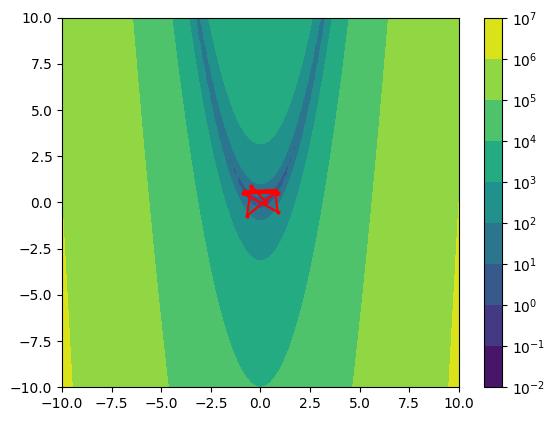

T:500  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________


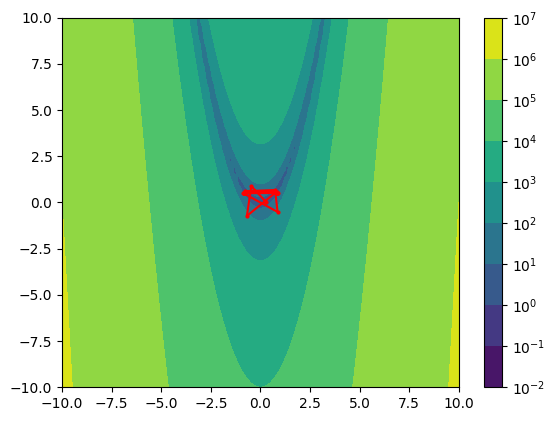

T:1000  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________


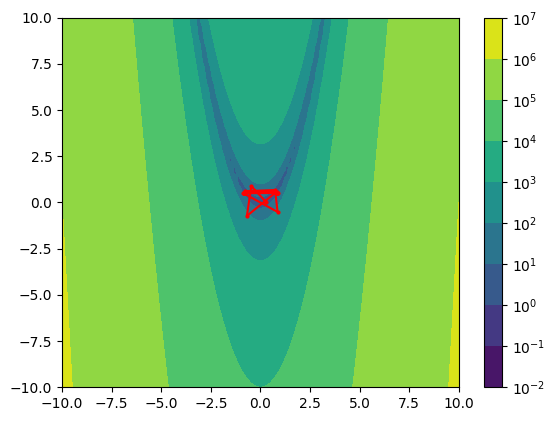

T:5000  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________


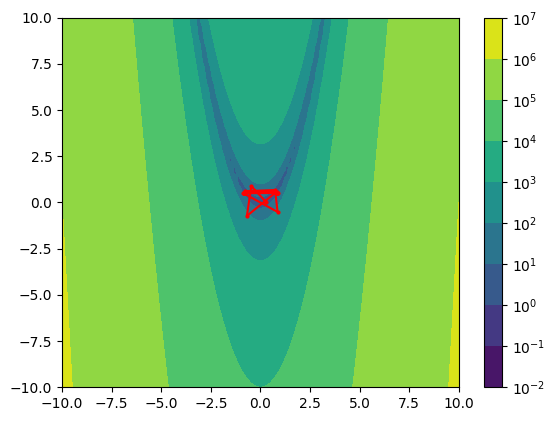

T:10000  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________


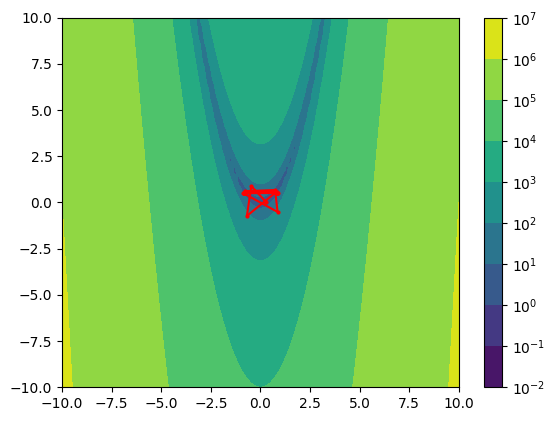

T:50000  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________


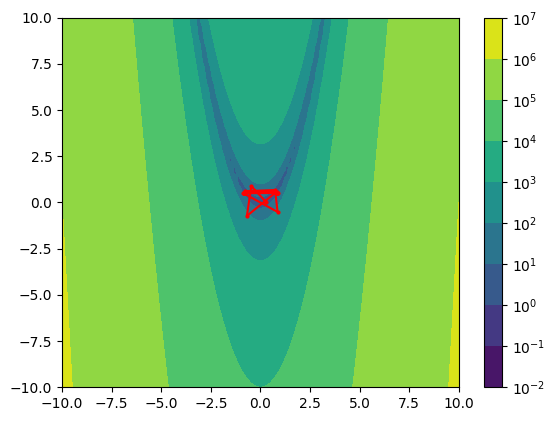

T:100000  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________


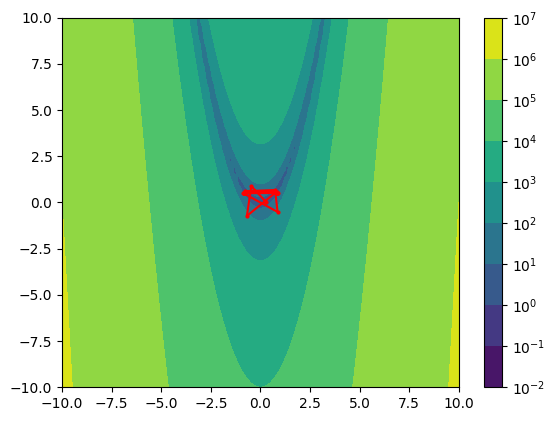

T:500000  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________


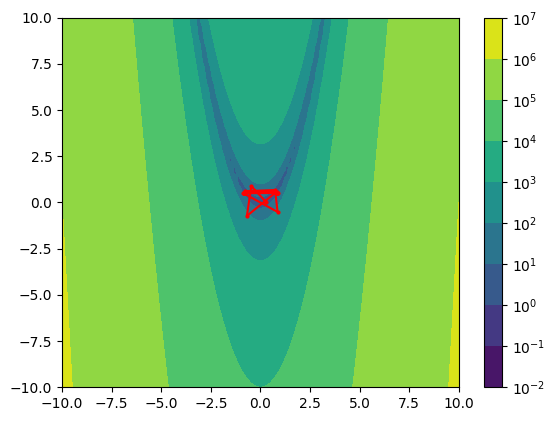

T:1000000  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________


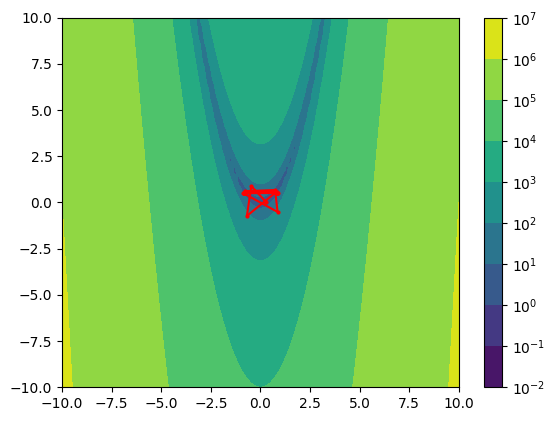

T:5000000  optimizers: [array([-0.84274164,  0.53831824])] optimal_value: [4.7577525502491245]
_____________________________________________________________________


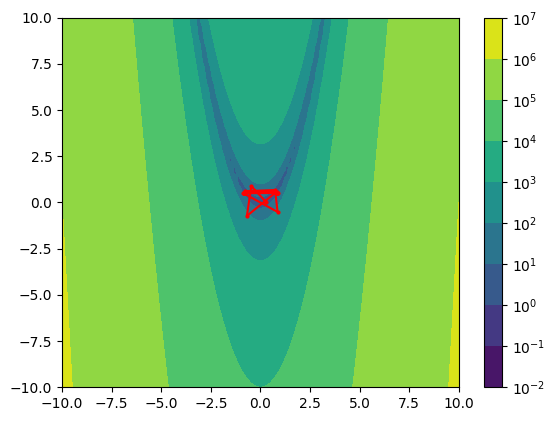

In [58]:
for T in max_itr:
  x=[0.,0.0]
  eta=0.3
  iteration,optimizers,optimal,x_all=proximal_gradient_descent_fx2(x,T,eta)
  print(f'T:{T}  optimizers: {optimizers} optimal_value: {optimal}')
  print('_____________________________________________________________________')
  x = np.linspace(-10, 10, 100)
  y = np.linspace(-10, 10, 100)
  X, Y = np.meshgrid(x, y)
  Z = fx2([X,Y])
  p = plt.contourf(X,Y,Z,locator=ticker.LogLocator())
  cbar = plt.colorbar(p)
  xcordinates = []
  ycordinates = []
  x0=(x_all)

  for j in x0:
    xcordinates.append(j[0])
    ycordinates.append(j[1])
  plt.plot(xcordinates,ycordinates, marker='o', color="red", markersize = 2, label = "coordinate_descent")
  plt.show()

Coordinate Descent is a powerful optimization algorithm known for its simplicity and efficiency in solving high-dimensional optimization problems. One key observation regarding Coordinate Descent is its ability to handle sparsity-inducing regularizers and non-smooth objective functions effectively. By iteratively updating individual coordinates while holding the others fixed, Coordinate Descent can efficiently exploit the structure of the optimization problem, making it particularly suitable for tasks such as feature selection and sparse regression. Additionally, Coordinate Descent lends itself well to parallelization, as each coordinate update can be performed independently, leading to significant speed-ups in large-scale optimization problems. However, Coordinate Descent may converge slowly, especially in highly correlated dimensions or when the objective function exhibits strong curvature along certain directions. Moreover, the convergence rate of Coordinate Descent can be sensitive to the ordering of coordinate updates, with different update strategies leading to varying convergence behaviors.

the rate at which it converges we see in plots the it is not exactly converges to optimal value therefore it is the drawback of this algorithm but is very fast as compare to other gradient descent and when we require not so senstive but need solution in less time we can use this one .


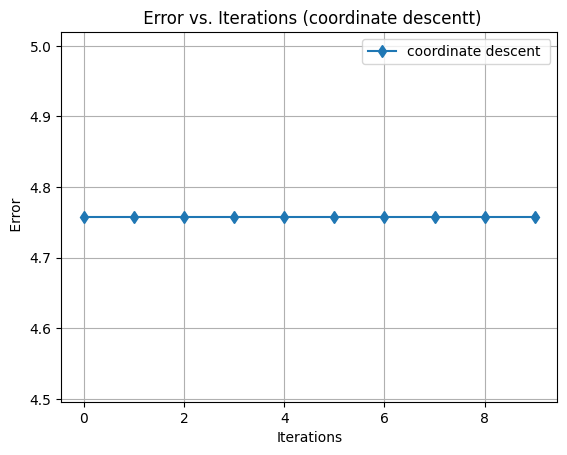

In [13]:
max_itr=[10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6,5000000]
error=optimal_function
plt.plot(error,label='coordinate descent ',marker='d')
plt.xlabel("Iterations")
plt.ylabel(" Error")
plt.title(" Error vs. Iterations (coordinate descentt)")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
#for eta=0.7
max_itr=[10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6,5000000]
for T in max_itr:
  x=[0.,0.0]
  eta=0.7
  iteration,optimizers,optimal,x_all=proximal_gradient_descent_fx2(x,T,eta)
  print(f'T:{T}  optimizers: {optimizers} optimal_value: {optimal}')
  print('_____________________________________________________________________')

T:100  optimizers: [array([-0.86146579,  0.50781561])] optimal_value: [7.343599057006621]
_____________________________________________________________________
T:500  optimizers: [array([-0.86146579,  0.50781561])] optimal_value: [7.343599057006621]
_____________________________________________________________________
T:1000  optimizers: [array([-0.86146579,  0.50781561])] optimal_value: [7.343599057006621]
_____________________________________________________________________
T:5000  optimizers: [array([-0.86146579,  0.50781561])] optimal_value: [7.343599057006621]
_____________________________________________________________________
T:10000  optimizers: [array([-0.86146579,  0.50781561])] optimal_value: [7.343599057006621]
_____________________________________________________________________
T:50000  optimizers: [array([-0.86146579,  0.50781561])] optimal_value: [7.343599057006621]
_____________________________________________________________________
T:100000  optimizers: [array([-0.8

The Cordinate descent algorithm  dependent on value of eta if we change the value of eta we move away from the optimal solution it is observed in this ques that error for eta 0.3 is less than the error in case of eta=0.7 and optimal value deviated more in this case.